In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

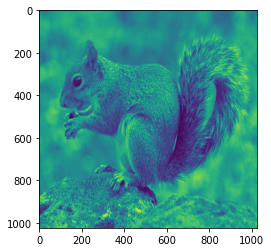

In [2]:
imgpath="GT.jpg"
target=cv2.imread(imgpath,0)
plt.imshow(target)

In [3]:
x = np.linspace(-10,10,1024)
y = np.linspace(-10,10,1024)
X,Y = np.meshgrid(x,y)
x0 = 0   
y0 = 0    
sigma = 2
A = 1
res = ((X-x0)**2 + (Y-y0)**2)/(2*(sigma**2))
input_intensity = A  * np.exp(-res)


In [4]:
A=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(target)))
print(A.shape)
iteration_num=100
error=[]
iters=[]

(1024, 1024)


'\nhologram=np.array(hologram)\nhologram=hologram.flatten()\nprint(hologram.shape)\ngray=[]\ngrayimage=np.zeros((1024,1024),dtype=complex)\nH=np.zeros((1024,1024),dtype=complex)\nfor i in range(len(hologram)):\n    real = math.cos(2*3.14159*hologram[i])\n    image = math.sin(2*3.14159*hologram[i])\n    comp=complex(real, image)\n    gray.append(comp)\n    \nfor i in range(1024):\n    for j in range(1024):\n        grayimage[i][j]=gray[i*1024+j]\n        Hangle=np.angle(grayimage[i][j])\n        Hreal=math.cos(grayimage[i][j])\n        Himage=math.sin(grayimage[i][j])\n        H[i][j]=complex(Hreal,Himage)\n\n\nb=abs(input_intensity)*H\nc=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(b)))\n\nplt.figure(figsize=(10,10))  \nplt.imshow(abs(c))\n'

In [6]:
def iExp(a):
    H=np.zeros((1024,1024),dtype=complex)
    for i in range(1024):
        for j in range(1024):
            Hangle=np.angle(a[i][j])
            #print(Hangle)
            Hreal=math.cos(Hangle)
            Himage=math.sin(Hangle)
            H[i][j]=complex(Hreal,Himage)
    return H

In [7]:
for i in range(iteration_num):
    print(i)
    angleA=iExp(A)
    B=abs(input_intensity)*angleA
    #B=abs(input_intensity)*np.exp(1j * np.angle(A))
    C=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(B)))
    angleC=iExp(C)
    D=abs(target)*angleC
    A=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(D)))
    error.append(sum(sum(abs(1.32*abs(C) - abs(target)))))
    iters.append(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [10]:
def plot(groundtruth, hologram,recons):
    plt.figure()
    plt.subplot(131)
    plt.title('Groundtruth')
    plt.axis('off')
    plt.imshow(groundtruth,cmap='gray')
    
    plt.subplot(132)
    plt.title('Hologram')
    plt.axis('off')
    plt.imshow(abs(hologram),cmap='gray')
    
    
    plt.subplot(133)
    plt.title('Reconstruction')
    plt.axis('off')
    plt.imshow(abs(recons),cmap='gray')
    plt.show()

def plot_loss(iters,y_loss):
    plt.plot(iters, y_loss, label='Loss rate', color='g')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('loss')
    plt.legend()   
    plt.pause(1.0)

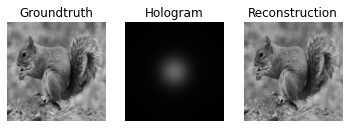

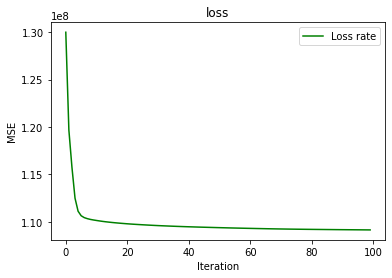

In [11]:
plot(target,A,C)
plot_loss(iters,error)

(1024, 1024)


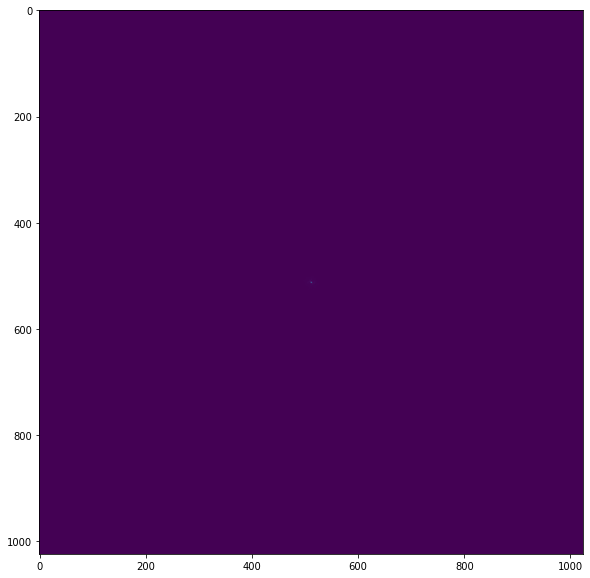

In [18]:
for i in range(iteration_num):
    print(i)
    angleA=iExp(A)
    Iti=abs(input_intensity)*angleA
    #B=abs(input_intensity)*np.exp(1j * np.angle(A))
    C=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(B)))
    angleC=iExp(C)
    D=abs(target)*angleC
    A=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(D)))
    error.append(sum(sum(abs(1.32*abs(C) - abs(target)))))
    iters.append(i)
